# Preparation

In [1]:
import pandas as pd
import glob
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
# set column width to be able to see full text
pd.set_option('display.max_colwidth', 100)

model_rankings = 'monoT5'

base_path = f'../indexing/results/{model_rankings}/'
# all_model_dirs = glob.glob(f'../indexing/results/{model_rankings}/*')
all_model_csvs = glob.glob(f'{base_path}/*.csv') 
plot_path = f'./plots'
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [2]:
number_of_answers = 10

model_dfs = []
for model_csv in all_model_csvs:
    df = pd.read_csv(model_csv)
    model_name = model_csv.split("/")[-1].split(".")[0].replace("_rankings", "")
    df["model"] = model_name
    model_dfs.append(df)

all_model_df = pd.concat(model_dfs, ignore_index=True)
all_model_df['is_natural_question'] = all_model_df['query'].str.endswith('?')
all_model_df['weighted_position']  = 1 - all_model_df['weighted_position']

In [3]:
all_model_df.describe()

,qid,score,rank,answer_number,weighted_position,num_answer_words,num_matching_words
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,86.040000,-4.558891,49.392688,5.500000,0.708629,228.882187,10.391750
std,32.340436,5.467277,67.260172,2.872371,0.363398,126.610634,15.960082
min,1.000000,-15.175696,0.000000,1.000000,0.004000,1.000000,0.000000
25%,59.000000,-10.558289,0.000000,3.000000,0.384615,117.000000,1.000000
50%,93.500000,-0.294940,8.000000,5.500000,0.950673,237.000000,5.000000
75%,113.000000,-0.009833,89.000000,8.000000,1.000000,331.000000,14.000000
max,132.000000,-0.000891,249.000000,10.000000,1.000000,512.000000,410.000000


In [4]:
# replace na answers with empty string
all_model_df['text'] = all_model_df['text'].fillna('')

In [5]:
all_model_df.qid.unique().size

50

In [6]:

# list natural question and non-natural question queries
natural_question_queries = all_model_df[all_model_df['is_natural_question']]['query'].unique()
non_natural_question_queries = all_model_df[~all_model_df['is_natural_question']]['query'].unique()

natural_question_queries, non_natural_question_queries

(array(['Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?',
        'Can I work and study full-time with multiple sclerosis?',
        'How do menopause symptoms relate to multiple sclerosis symptoms?',
        'What are the most common chronic diseases? What effects do chronic diseases have for the society and the individual?',
        'disclosing multiple sclerosis at work, how will colleagues react?',
        'Is a ketogenic / keto diet suitable for people with diabetes?',
        'When will I start to feel better with multiple sclerosis?',
        'Will multiple sclerosis affect my career?',
        'What does multiple sclerosis diagnosis include? What does it change?',
        'What are the most common mental health problems? How can I prevent or manage the most common mental health problems?',
        'What is holistic medicine and what does it include?',
        'How to manage multiple sclerosis?',
        'Does multiple sclerosis relate to sleeping prob

In [7]:
all_model_df['model'].unique()

array(['gpt2-large', 'meta-llama_Llama-2-13b-chat-hf', 'gpt2-medium',
       'gpt2', 'meta-llama_Llama-2-7b-chat-hf', 'gpt2-xl', 'chatgpt',
       'tiiuae_falcon-7b-instruct'], dtype=object)

In [8]:
# rename models to more readable names
names_dict = {
    "gpt2": "GPT-2",
    "gpt2-medium": "GPT-2 M",
    "gpt2-large": "GPT-2 L",
    "gpt2-xl": "GPT-2 XL",
    "tiiuae_falcon-7b-instruct": "Falcon 7B",#
    "meta-llama_Llama-2-7b-chat-hf": "Llama-2 7B",
    "meta-llama_Llama-2-13b-chat-hf": "Llama-2 13B",
    "chatgpt": "ChatGPT"
}
# define colors for models, different shades of same color for different sizes
# gpt2 blue, falcon orange, llama green, chatgpt red
# large models are darker
color_dict = {
    "GPT-2": sns.color_palette("Blues")[0],
    "GPT-2 M": sns.color_palette("Blues")[1],
    "GPT-2 L": sns.color_palette("Blues")[2],
    "GPT-2 XL": sns.color_palette("Blues")[3],
    "Falcon 7B": sns.color_palette("Oranges")[4],
    "Llama-2 7B": sns.color_palette("Greens")[1],
    "Llama-2 13B": sns.color_palette("Greens")[4],
    "ChatGPT": sns.color_palette("Reds")[4]
}

all_model_df['model'] = all_model_df['model'].replace(names_dict)
# order models
order = [
    "GPT-2",
    "GPT-2 M",
    "GPT-2 L",
    "GPT-2 XL",
    "Falcon 7B",
    "Llama-2 7B",
    "Llama-2 13B",
    "ChatGPT",
]
all_model_df['model'] = pd.Categorical(all_model_df['model'], order)


In [9]:
all_model_df[all_model_df["prompt"]=="multimedqa"]

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question
0,gpt2-large_112,A respiratory disease affecting the airways that can cause shortness of breath or wheezing in pe...,112,symptoms of asthma,-9.023682,119,multimedqa,1,0.433333,413,23,GPT-2 L,False
1,gpt2-large_109,This is an inherited disease (genetically related to rheumatoid arthritis) that affects all type...,109,ehlers danlos syndrome POTS nausea stomach pain,-12.085517,37,multimedqa,1,0.075000,410,0,GPT-2 L,False
2,gpt2-large_83,There have been several studies that show MS is more prevalent than many people think. For examp...,83,Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?,-0.099994,9,multimedqa,1,0.961538,397,39,GPT-2 L,True
3,gpt2-large_118,You will need this information in order to understand what your doctor has recommended for you a...,118,stage 4 triple negative breast cancer treatment,-13.094489,201,multimedqa,1,0.098655,443,2,GPT-2 L,False
4,gpt2-large_81,Yes! MS patients can earn money by earning a living while studying. They may also use their skil...,81,Can I work and study full-time with multiple sclerosis?,-0.028917,0,multimedqa,1,1.000000,307,18,GPT-2 L,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,tiiuae_falcon-7b-instruct_53,Psychotherapy is a form of medical treatment that aims to help individuals overcome psychologica...,53,what is psychotherapy?,-0.062840,0,multimedqa,10,1.000000,296,7,Falcon 7B,True
14496,tiiuae_falcon-7b-instruct_108,Chronic diarrhea can lead to dehydration and electrolyte imbalances which can cause symptoms lik...,108,chronic diarrhea short-term memory sweating inability to regulate body temperature heart palpita...,-0.037919,0,multimedqa,10,1.000000,63,9,Falcon 7B,False
14497,tiiuae_falcon-7b-instruct_45,"While there is no known cure for diabetes, it can be managed with lifestyle changes, medication,...",45,Can diabetes be cured?,-0.006558,1,multimedqa,10,0.992063,51,3,Falcon 7B,True
14498,tiiuae_falcon-7b-instruct_119,The best pillow to use for neck pain is one that provides proper support for your head and neck....,119,best pillow neck pain,-0.001819,0,multimedqa,10,1.000000,119,8,Falcon 7B,False


In [10]:
all_model_df.groupby(["qid", "model"])["weighted_position"].describe()

/tmp/ipykernel_25155/2449016857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby(["qid", "model"])["weighted_position"].describe()


count      mean       std       min       25%       50%  \
qid model                                                                  
1   GPT-2         40.0  0.722347  0.245340  0.081633  0.567347  0.777551   
    GPT-2 M       40.0  0.687653  0.281180  0.179592  0.425510  0.685714   
    GPT-2 L       40.0  0.941122  0.144307  0.248980  0.971429  0.991837   
    GPT-2 XL      40.0  0.894082  0.184831  0.395918  0.954082  0.979592   
    Falcon 7B     40.0  1.000000  0.000000  1.000000  1.000000  1.000000   
...                ...       ...       ...       ...       ...       ...   
132 GPT-2 XL      40.0  0.624800  0.365902  0.008000  0.294000  0.720000   
    Falcon 7B     40.0  0.755600  0.404285  0.008000  0.662000  1.000000   
    Llama-2 7B    40.0  0.897400  0.218458  0.008000  0.902000  1.000000   
    Llama-2 13B   40.0  0.863200  0.311011  0.008000  0.988000  1.000000   
    ChatGPT       40.0  1.000000  0.000000  1.000000  1.000000  1.000000   

                      75%       max  
qid model                            
1   GPT-2        0.943878  0.983673  
    GPT-2 M      0.976531  1.000000  
    GPT-2 L      0.995918  1.000000  
    GPT-2 XL     0.995918  1.000000  
    Falcon 7B    1.000000  1.000000  
...                   ...       ...  
132 GPT-2 XL     1.000000  1.000000  
    Falcon 7B    1.000000  1.000000  
    Llama-2 7B   1.000000  1.000000  
    Llama-2 13B  1.000000  1.000000  
    ChatGPT      1.000000  1.000000  

[400 rows x 8 columns]

In [11]:
# average the weighted position for each model and query
all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()

/tmp/ipykernel_25155/1145918089.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()


,qid,model,prompt,weighted_position
0,1,GPT-2,multimedqa,0.832245
1,1,GPT-2,no_prompt,0.518367
2,1,GPT-2,q,0.767347
3,1,GPT-2,question,0.771429
4,1,GPT-2 M,multimedqa,0.616735
...,...,...,...,...
1595,132,Llama-2 13B,question,1.000000
1596,132,ChatGPT,multimedqa,1.000000
1597,132,ChatGPT,no_prompt,1.000000
1598,132,ChatGPT,q,1.000000


# Boxplot of weighted position

In [12]:
model_map = {"GPT-2": "GPT-2", "GPT-2 M": "GPT-2 M", "GPT-2 L": "GPT-2 L", "GPT-2 XL": "GPT-2 XL", 
             "Falcon 7B": "Fal 7B", "Llama-2 7B": "Lla 7B", "Llama-2 13B": "Lla 13B", "ChatGPT": "ChatGPT"}
all_model_df["model_short"] = all_model_df["model"].apply(lambda x: model_map[x]) 

/tmp/ipykernel_25155/4079690535.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_model_df = df.groupby(["qid", model_col, "prompt"])["weighted_position"].mean().reset_index()


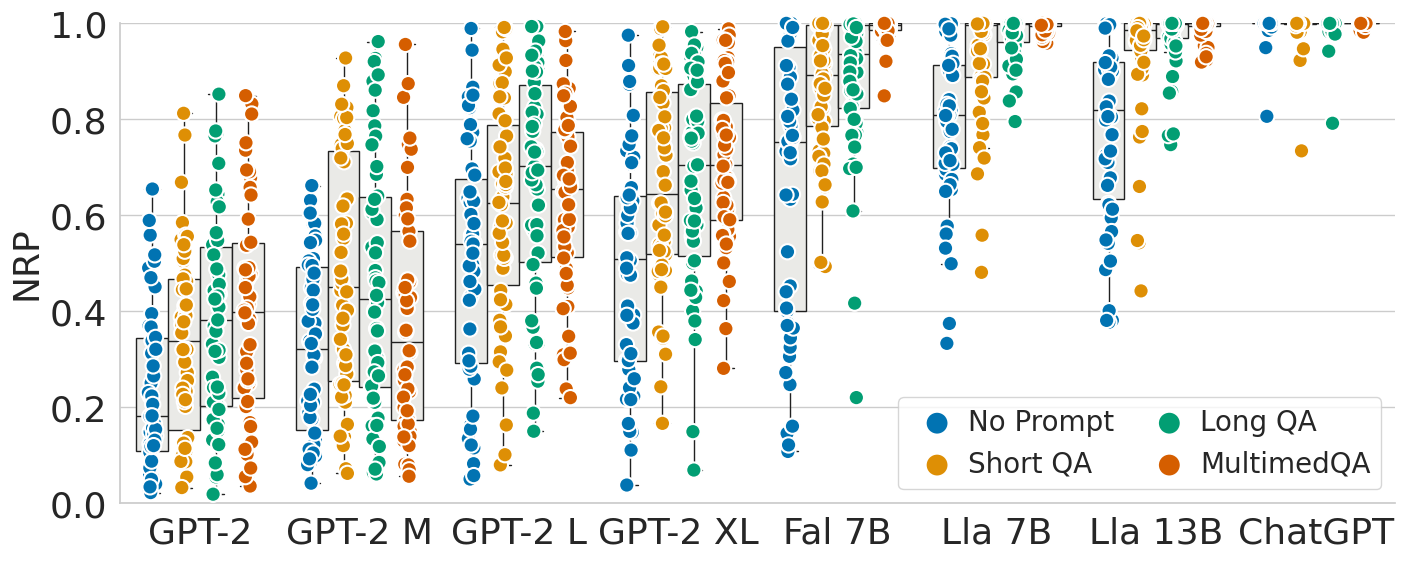

In [13]:
# boxplot of weighted_position
import seaborn as sns
import matplotlib.pyplot as plt

legend_labels = ["No Prompt", "Short QA", "Long QA", "MultimedQA"]
fontsize = 26
legend_fontsize = 20
header_dict = {"title": "", 
               "loc": "lower right",
               "fontsize": legend_fontsize,
               "labels": legend_labels,
               "handletextpad": 0.1,
               "ncols": 2,
               "columnspacing": 1,
               "markerscale": 1.5}
contained_dict = {"title": "", 
                  "loc": (0.8, 0.05),
                  "fontsize": fontsize,
                  "labels": legend_labels,
                  "handletextpad": 0.1,
                  "ncols": 1,
                  "columnspacing":1.5,
                  "markerscale": 3}



def new_boxplot(df = all_model_df, leg_dict = header_dict, model_col="model_short", fontsize=fontsize):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(15, 6))

    # average the weighted position for each model and query
    avg_model_df = df.groupby(["qid", model_col, "prompt"])["weighted_position"].mean().reset_index()

    # use color_dict to color models
    sns.stripplot(ax=ax, 
                  x=model_col, 
                  y="weighted_position", 
                  data=avg_model_df, 
                  hue="prompt", 
                  size=11, 
                  dodge=True,
                  edgecolor="white", # "#424242",
                  linewidth=1.5,
                  hue_order=["no_prompt","q","question","multimedqa"], 
                  alpha=1, 
                  palette="colorblind",
                 clip_on=False)
    
    sns.boxplot(ax=ax,
                x=model_col, 
                y="weighted_position", 
                data=avg_model_df, 
                hue="prompt",
                fill=True,
                linecolor="#212121",
                palette=["#EAEAE7"]*4, 
                fliersize=0, 
                hue_order=["no_prompt","q","question","multimedqa"])
    
    ax.set_ylabel('NRP')
    sns.despine(top=True, right=True)
    plt.xticks(fontsize=fontsize,rotation=0)
    plt.yticks(fontsize=fontsize)
    
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_size(fontsize)
    plt.ylim([0.0, 1.0])
    plt.subplots_adjust(left=0.05, right=0.9, bottom=0.1, top=0.9)
    
    leg = plt.legend(**leg_dict)
    for lh in leg.legend_handles: 
        lh.set_alpha(1)
    plt.savefig(f'{plot_path}/weighted_position_boxplot_new.pdf', bbox_inches='tight')
    plt.show()

new_boxplot()

# Ranking comparison

In [14]:
# are the ranking differences between Llama-2 7b and 13b significant?

from scipy.stats import wilcoxon
import numpy as np

llama_7b_df = all_model_df[all_model_df['model'] == 'Llama-2 7B']
llama_13b_df = all_model_df[all_model_df['model'] == 'Llama-2 13B']

# wilcoxon test
wilcoxon(llama_7b_df['weighted_position'], llama_13b_df['weighted_position'])

WilcoxonResult(statistic=np.float64(193114.5), pvalue=np.float64(0.5404341919579495))

In [15]:
# table with the statistics from the previous boxplot
all_model_df[all_model_df["prompt"]=="multimedqa"].groupby('model')['weighted_position'].describe()

/tmp/ipykernel_25155/1479545346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df[all_model_df["prompt"]=="multimedqa"].groupby('model')['weighted_position'].describe()


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
GPT-2,500.0,0.396814,0.325692,0.004032,0.090007,0.318232,0.667105,1.0
GPT-2 M,500.0,0.381866,0.351034,0.004000,0.051444,0.255720,0.722222,1.0
GPT-2 L,500.0,0.626181,0.330485,0.005556,0.349593,0.682733,0.956696,1.0
GPT-2 XL,500.0,0.707847,0.301396,0.004566,0.512829,0.814284,0.972470,1.0
Falcon 7B,500.0,0.988081,0.034486,0.632479,0.995935,1.000000,1.000000,1.0
Llama-2 7B,500.0,0.994825,0.014736,0.865079,1.000000,1.000000,1.000000,1.0
Llama-2 13B,500.0,0.990245,0.063055,0.239819,1.000000,1.000000,1.000000,1.0
ChatGPT,500.0,0.998853,0.004385,0.936508,1.000000,1.000000,1.000000,1.0


# NRP by Model Parameter

In [16]:
"""
124M
355M
774M
1.5B
7B
7B
13B
185B
"""
model_size_dict = {
    "GPT-2": 124000000,
    "GPT-2 M": 355000000,
    "GPT-2 L": 774000000,
    "GPT-2 XL": 1500000000,
    "Falcon 7B": 7000000000,
    "Llama-2 7B": 7000000000,
    "Llama-2 13B": 13000000000,
    "ChatGPT": 185000000000
}

all_model_df["model_size"] = all_model_df["model"].apply(lambda x: model_size_dict[x])

In [17]:
pal = sns.color_palette("colorblind")
pal.as_hex()[1]

'#de8f05'

/tmp/ipykernel_25155/1758783346.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_model_df = (df.groupby(["qid", model_col, "prompt"])
/tmp/ipykernel_25155/1758783346.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_weighted_position_df = (avg_model_df[avg_model_df["prompt"]=="multimedqa"].groupby([model_col,'prompt'])


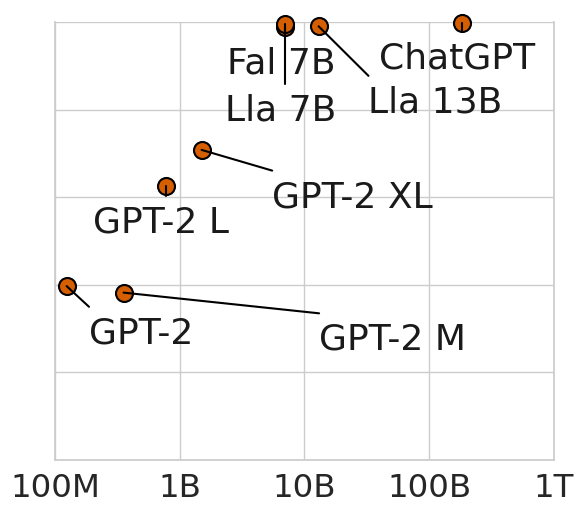

In [18]:
import textalloc as ta

pal = sns.color_palette("colorblind")
pal.as_hex()


def scatter_plot_new(df = all_model_df, model_col="model_short"):
    fontsize = 26
    
    # average the weighted position for each model and query
    avg_model_df = (df.groupby(["qid", model_col, "prompt"])
                    .agg({
                        "weighted_position": "mean",
                        "model_size": "first"
                    })
                    .reset_index()
                   )    
    # group by model name and get mean weighted position, add model size
    model_weighted_position_df = (avg_model_df[avg_model_df["prompt"]=="multimedqa"].groupby([model_col,'prompt'])
                                  .agg({
                                      "weighted_position": "mean",
                                      "model_size": "first"
                                  }).reset_index())
    model_weighted_position_df = model_weighted_position_df.sort_values(by='model_size')
    # model_weighted_position_df = model_weighted_position_df[model_weighted_position_df["prompt"]]

    # plot weighted position vs model size, draw line to show the trend
    # x axis is log scaled
    # model names appear directly above the points
    fig, ax = plt.subplots(figsize=(6, 5.3))
    sns.despine(top=True, right=False)

    # Reuse the color for multimedqa
    multimedqa_color = sns.color_palette("colorblind").as_hex()[3]
    
    ax = sns.scatterplot(x="model_size", 
                         y="weighted_position", 
                         data=model_weighted_position_df, 
                         color=multimedqa_color,
                         edgecolor="black",
                         linewidth=1.5,
                         s=150,
                         clip_on=False)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xscale('log')
    ax.set_xticks([ 1e8, 1e9, 1e10, 1e11, 1e12])
    ax.set_xticklabels(['100M', '1B', '10B', '100B', '1T'])
    ax.set_ylim(0.0, 1.0)
    yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax.set_yticks(yticks, [" "]*len(yticks))

    ax.grid(True)

    plt.xticks(fontsize=fontsize*0.9)
    plt.yticks(fontsize=fontsize*0.9)
    ax.xaxis.label.set_size(fontsize)
    ax.yaxis.label.set_size(fontsize)

    ax.set_xlim(1e8, 1e12)

    # Annotate the points (LLa 13B is annotated separately)
    labels1 = model_weighted_position_df.loc[model_weighted_position_df[model_col] != "Lla 13B"].reset_index()
    x, y = labels1["model_size"], labels1["weighted_position"]
    ta.allocate(ax, x, y, labels1[model_col], linecolor="black", avoid_crossing_label_lines=True, direction="south", linewidth=1.5,
                avoid_label_lines_overlap=True, min_distance=0.02, max_distance=0.55, x_scatter=x, y_scatter=y, textsize=fontsize)

    labels2 = model_weighted_position_df.loc[model_weighted_position_df[model_col] == "Lla 13B"].reset_index()
    x, y = labels2["model_size"], labels2["weighted_position"]
    ta.allocate(ax, x, y, labels2[model_col], linecolor="black", avoid_crossing_label_lines=True, direction="southeast", linewidth=1.5,
                avoid_label_lines_overlap=True, min_distance=0.1, max_distance=1, x_scatter=x, y_scatter=y, textsize=fontsize)

    plt.tight_layout()
    plt.savefig(f'{plot_path}/weighted_position_vs_model_size.pdf', bbox_inches='tight')
    plt.show()

scatter_plot_new(all_model_df)